Create directory **Classification_Images** and download 30 images of each category using bing image downloader.

In [1]:
%mkdir Classification_Image

In [2]:
!pip install bing_image_downloader

In [3]:
# Import Dog  images using bing downloader
from bing_image_downloader import downloader
downloader.download("Dog",limit=100, output_dir="Classification_Image",adult_filter_off=True)

[%] Downloading Images to /content/Classification_Image/Dog


[!!]Indexing page: 1

[%] Indexed 9 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/d9/8d/ec/d98dec5aaf01b0c04961a87285a0be4e.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://breakbrunch.com/wp-content/uploads/2020/01/chika-fujiwar-cosplay-cherryneko-5e24cc1c155d6595c.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.dogvills.com/wp-content/uploads/2017/04/Bloated-Puppy-f.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.sunnyskyz.com/uploads/2014/11/96jqb-02-Dawg.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.germanshepherds.com/forum/attachments/introductions-welcome-mat/517863d1549489527-herman-gsd-x-english-bulldog-0ca29572-936c-48bb-882f-dae700b23583_1549489490480.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://cdn.shopify.com/s/files/1/1101/6960/files/LOVED-YOU-BEST-poem_large.jpg?8812048550819452699
[

In [4]:
# Import Cat images using bing downloader
from bing_image_downloader import downloader
downloader.download("Cat",limit=100, output_dir="Classification_Image",adult_filter_off=True)

[%] Downloading Images to /content/Classification_Image/Cat


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://designbump.com/wp-content/uploads/2014/09/funny-jumping-cats-51__880.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://wanna-joke.com/wp-content/uploads/2015/02/funny-gif-cat-scratching-snow-door.gif
[%] File Downloaded !

[%] Downloading Image #3 from https://www.bing.com/th/id/OGC.5c62accb9e3d91689db36d2103f64e0d?pid=1.7&amp;rurl=http%3a%2f%2fwanna-joke.com%2fwp-content%2fuploads%2f2015%2f02%2ffunny-gif-cat-scratching-snow-door.gif&amp;ehk=3R%2bEuxKeomdODmcOxbo221YSiBz5gfRm3kaogQanxZw%3d
[!] Issue getting: https://www.bing.com/th/id/OGC.5c62accb9e3d91689db36d2103f64e0d?pid=1.7&amp;rurl=http%3a%2f%2fwanna-joke.com%2fwp-content%2fuploads%2f2015%2f02%2ffunny-gif-cat-scratching-snow-door.gif&amp;ehk=3R%2bEuxKeomdODmcOxbo221YSiBz5gfRm3kaogQanxZw%3d
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #3 from https

In [5]:
import shutil
shutil.make_archive('Classification_Image', 'zip', 'Classification_Image')

'/content/Classification_Image.zip'

Generate **requirements.txt**

In [6]:
# Find all files needed to run this code
!pip freeze > requirements.txt

**Preprocessing of data** using os module

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

target = []
flat_data = []
images = []
DataDirectory = '/content/Classification_Image'

Categories = ["Dog","Cat"]

for i in Categories:
  print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
  target_class = Categories.index(i)
  path = os.path.join(DataDirectory,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(target_class)
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

Category is: Dog 	Label encoded as: 0
Category is: Cat 	Label encoded as: 1


**Dataframe creation** using pandas library

In [8]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.243137,0.439216,0.392157,0.246627,0.440196,0.396078,0.247059,0.443137,0.399020,0.247059,0.443137,0.400000,0.250980,0.447059,0.403922,0.250980,0.450657,0.403922,0.254902,0.453922,0.407843,0.254902,0.454471,0.407843,0.258824,0.457843,0.414706,0.259804,0.462745,0.419176,0.265686,0.462745,0.419500,0.266667,0.466667,0.419608,0.266667,0.466667,0.422549,0.266667,...,0.609029,0.415245,0.224284,0.590078,0.402167,0.216549,0.590627,0.418951,0.246078,0.630284,0.464275,0.296078,0.652833,0.490745,0.321569,0.666667,0.486931,0.307843,0.623098,0.430941,0.250549,0.538559,0.352941,0.194990,0.516118,0.339647,0.181804,0.529951,0.350431,0.188667,0.551961,0.362637,0.189108,0.587147,0.379412,0.196078,0.603922,0.392157,0.196078,0
1,0.105882,0.000000,0.007843,0.105882,0.000000,0.007843,0.113725,0.002614,0.003922,0.117647,0.003922,0.003922,0.121569,0.003922,0.003922,0.121569,0.003922,0.003922,0.121569,0.003922,0.003922,0.121569,0.003922,0.003922,0.117647,0.003922,0.003922,0.113725,0.000000,0.007843,0.113725,0.000000,0.007843,0.113725,0.000000,0.007843,0.109804,0.000000,0.007843,0.105882,...,0.011765,0.007843,0.000000,0.007843,0.007843,0.000000,0.007843,0.007843,0.000000,0.007843,0.005229,0.000000,0.003922,0.003922,0.000000,0.003922,0.003922,0.000000,0.007843,0.003922,0.000000,0.007843,0.007843,0.000000,0.007843,0.003922,0.000000,0.007843,0.003922,0.000000,0.007843,0.003922,0.000000,0.003922,0.003922,0.000000,0.003922,0.003922,0.000000,0
2,0.425163,0.385948,0.378105,0.384314,0.346732,0.337255,0.317647,0.294118,0.278431,0.272549,0.252941,0.239216,0.256863,0.233333,0.231373,0.237582,0.214052,0.214052,0.224183,0.200654,0.200654,0.223856,0.200327,0.200327,0.213725,0.190196,0.190196,0.196078,0.174510,0.174510,0.178431,0.162745,0.164706,0.162745,0.147059,0.152941,0.144444,0.138889,0.156209,0.149020,...,0.862745,0.882353,0.945098,0.858824,0.878431,0.945098,0.858824,0.878431,0.945098,0.847059,0.876471,0.949020,0.843137,0.874510,0.949020,0.843137,0.872549,0.947059,0.839216,0.870588,0.943137,0.835294,0.866667,0.941176,0.831373,0.862745,0.937255,0.831373,0.860784,0.937255,0.827451,0.858824,0.933333,0.825490,0.856863,0.929412,0.823529,0.854902,0.925490,0
3,0.226275,0.159608,0.128235,0.234118,0.167451,0.136078,0.241176,0.174510,0.143137,0.243137,0.176471,0.145098,0.247059,0.176471,0.149020,0.259216,0.168235,0.149020,0.267843,0.164706,0.149020,0.281765,0.162157,0.150392,0.306275,0.170196,0.162353,0.327843,0.182745,0.175961,0.327843,0.190588,0.182745,0.322745,0.185490,0.177647,0.317059,0.179804,0.171961,0.312549,...,0.239608,0.208235,0.200392,0.231412,0.200039,0.192196,0.250588,0.219216,0.211373,0.255176,0.223804,0.215961,0.251373,0.220000,0.212157,0.242941,0.211569,0.203725,0.237255,0.205882,0.198039,0.249804,0.218431,0.210588,0.250588,0.219216,0.211373,0.268627,0.237255,0.229412,0.236471,0.205098,0.197255,0.249020,0.217647,0.209804,0.220000,0.188627,0.180784,0
4,0.764706,0.556863,0.255885,0.776471,0.556863,0.266667,0.780392,0.560784,0.266667,0.776471,0.564706,0.266667,0.780392,0.562275,0.270588,0.780392,0.560784,0.270588,0.780392,0.560784,0.270588,0.780392,0.560784,0.270588,0.776471,0.560784,0.270588,0.768627,0.559471,0.262745,0.764706,0.556863,0.260105,0.772549,0.564974,0.270588,0.776471,0.568627,0.274510,0.776471,...,0.733333,0.525490,0.262745,0.740471,0.529412,0.262745,0.757412,0.549020,0.278431,0.772549,0.560784,0.286275,0.776471,0.564706,0.290196,0.774282,0.564706,0.286275,0.788235,0.580392,0.298039,0.807843,0.595059,0.309804,0.829087,0.615776,0.325490,0.843137,0.631373,0.338745,0.854902,0.643137,0.352941,0.850980,0.631373,0.349020,0.820591,0.603095,0.328078,0
...,...,...,...,...,...,...,...,...,...,...,...,.

AxesImage(54,36;334.8x217.44)


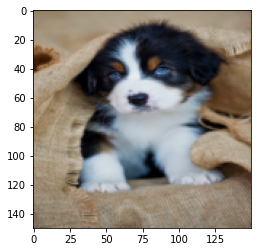

In [26]:
print(plt.imshow(images[30]))

**Test and train dataset** creation using sklearn library functions
1.   Data is first split into input and output
2.   Input and Output are further split into testing and training data, individually



In [10]:
from sklearn.model_selection import train_test_split


x = df.iloc[:,:-1].values
y = target
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=109,stratify=y)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (200, 67500)
Output data dimensions: (200,)
Dimensions of input training data: (140, 67500)
Dimensions of input testing data: (60, 67500)
Dimensions of output training data: (140,)
Dimensions of output testing data: (60,)


In [11]:
print("Labels\t\t   Image index considered")
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

Labels		   Image index considered
(array([0, 1]), array([70, 70]))
(array([0, 1]), array([30, 30]))


**Classification** using SVM

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                    
cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 6) 
cv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.8s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.857 total time=   0.7s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.964 total time=   0.8s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.8s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.929 total time=   0.7s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.893 total time=   0.9s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.821 total time=   0.9s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.929 total time=   0.9s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.893 total time=   0.9s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.821 total time=   0.9s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.6s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=6)

In [13]:
print("Best parameters to apply are:",cv.best_params_)
svm = cv.best_estimator_
print("Model after tuning is:\n",svm)

Best parameters to apply are: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Model after tuning is:
 SVC(C=1, gamma=0.001)


In [14]:
y_prediction = svm.predict(x_test)

In [15]:
print("Expected results: ",y_test)
print("Predicted results:",y_prediction)

Expected results:  [1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0]
Predicted results: [1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0]


**Evaluation of model**


1.   **Precision** measures how many positives were actually positive (Positive predictive ability)
2.   **Recall** measures how many positives were correctly predicted (True positive rate)
3.   **Confusion matri**x is a square matrix where rows are true (expected labels) and columns are predicted labels
4.   **Accuracy** measures correctly classified data vs total data

In [16]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix results:\n",confusion_matrix(y_prediction,y_test))
print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test))

Confusion matrix results:
 [[26  1]
 [ 4 29]]

Classification report of model:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.97      0.88      0.92        33

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

Accuracy score: 91.66666666666666


Save model using **pickle** library

In [17]:
import pickle
pickle.dump(svm,open("Classification_Model.p","wb"))

In [18]:
test_model = pickle.load(open("Classification_Model.p","rb"))

Enter url of image to test: /content/Classification_Image/Cat/Image_37.jpg
Dimensions of original image are: (1001, 750, 3)
PREDICTED OUTPUT IS: Cat


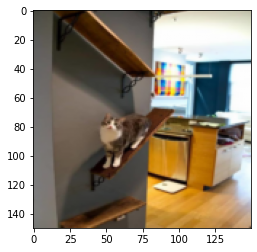

In [22]:
flat_data = []
url = input ('Enter url of image to test: ')
img_array = imread(url)
img_resized = resize(img_array,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print("Dimensions of original image are:",img_array.shape)
plt.imshow(img_resized)
y_output = test_model.predict(flat_data)
y_output = Categories[y_output[0]]
print("PREDICTED OUTPUT IS:",y_output)

Enter url of image to test: /content/Classification_Image/Dog/Image_100.jpg
Dimensions of original image are: (994, 560, 3)
PREDICTED OUTPUT IS: Dog


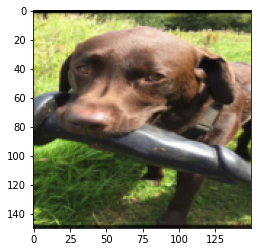

In [23]:
flat_data = []
url = input ('Enter url of image to test: ')
img_array = imread(url)
img_resized = resize(img_array,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print("Dimensions of original image are:",img_array.shape)
plt.imshow(img_resized)
y_output = test_model.predict(flat_data)
y_output = Categories[y_output[0]]
print("PREDICTED OUTPUT IS:",y_output)